*Telecommunication customer churn*

CIA-3
(ALLEN.P.AGNELO)
1928604 

*Business Understanding

Numerous telecom companies are present all over the world. Telecommunication market is facing a
severe loss of revenue due to increasing competition among them and loss of potential customers.
Many companies are finding the reasons of losing customers by measuring customer loyalty to regain
the lost customers. To keep up in the competition and to acquire as many customers, most operators
invest a huge amount of revenue to expand their business in the beginning. Therefore, it has become
important for the operators to earn back the amount they invested along with at least the minimum
profit within a very short period of time.

*Purpose of study
 
Churn rate is the measurement for the number of customers moving out and in during a specific period of time. If the reason for churning is known, the providers can then improve their services to fulfil the needs of the customers. Churns can be reduced
by analysing the past history of the potential customers systematically. Large amount of information is maintained by telecom companies for each of their customers that keeps on changing rapidly due to competitive environment.

This information includes the details about billing, calls and network data. The huge availability of information arises the scope of using Data mining techniques in the telecom database. The information available can be analysed in different perspectives to provide various ways to the operators to predict and reduce churning. Only the relevant details are used in analysis which contribute to the study from the information given. 

*Data Understanding

The Telecom customer churn data contains information about a fictional telecom company that
provided home phone and Internet services to 7043 customers in California. 

It indicates which customers have left, stayed, or signed up for their service. This data module tracks a fictional telco
company's customer churn based on a variety of possible factors. The churn column indicates whether
or not the customer left within the last month. Other columns include gender, dependents, monthly
charges, and many with information about the types of services each customer has.

In [8]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io



In [9]:
#First we start by reading the data 
telcom=pd.read_csv('C:\R\datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

In [10]:
#Print is used to display the dataset.
print(telcom)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
6     1452-KIOVK    Male              0      No        Yes      22   
7     6713-OKOMC  Female              0      No         No      10   
8     7892-POOKP  Female              0     Yes         No      28   
9     6388-TABGU    Male              0      No        Yes      62   
10    9763-GRSKD    Male              0     Yes        Yes      13   
11    7469-LKBCI    Male              0      No         No      16   
12    8091-TTVAX    Male              0     Yes         No      58   
13    0280-XJGEX    

In [11]:
#Head shows the first five rows along with all the variables of the dataset.
telcom.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum().values.sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


- *There are 7043 records in the dataset.
- There are 21 features in the dataset - "Churn" is the target/dependent variable (this is what we will try to predict), and rest 30 are independent variables which we need to explore further.
- Only 3 features are numeric - "SeniorCitizen" (categorical), and "tenure" and "MonthlyCharges" (continuous).
- Datatype of the rest of the features is object, looking at the sample data they look like to be of type string. Some of these features are categorical, which we will map into numerical values.
- There is absolutely NO missing data. This is amazing!

In [ ]:
#To find out the distribution of churn rate 

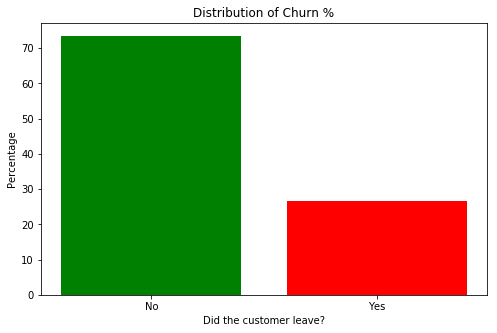

In [13]:
fig, axes = plt.subplots(figsize=(8,5))
data = telcom["Churn"].value_counts(normalize=True)
axes.bar(data.index, data*100, color=['green', 'red'])
axes.set_title('Distribution of Churn %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Did the customer leave?')
plt.show()

In the dataset provided, close to 30% customers churned, while the rest remained with the service provider.

In [14]:
# Create column ChurnVal with - Yes = 1 and No = 0
churn_mapping = {"No": 0, "Yes": 1}
telcom['ChurnVal'] = telcom['Churn'].map(churn_mapping)

In [15]:
telcom.head()

#This is to show the first five rows with all the variables of the dataset.
#We can see that the new column CharVal with numeric values of churn column has been added.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnVal
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [ ]:
#We have created an additional column called ChurnVal which displays the churn column in nurmeric form with YES=1 and NO=0 

*GENDER

To analyse if gender has any influence on the churning.

First we need to analyse the gender distribution in the dataset.

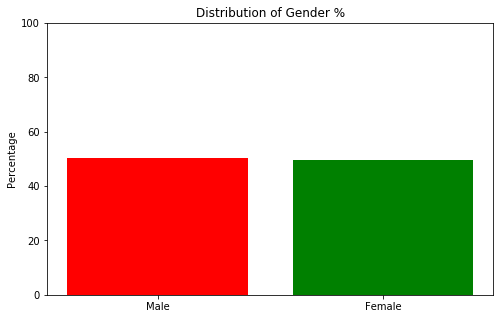

In [17]:
fig, axes1 = plt.subplots(figsize=(8,5))

# Plot distribution of gender data
data = telcom["gender"].value_counts(normalize=True)
my_colors='rgbkymc'
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Gender %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

plt.show()

The Dataset has almost equal distribution of Male and Female customers


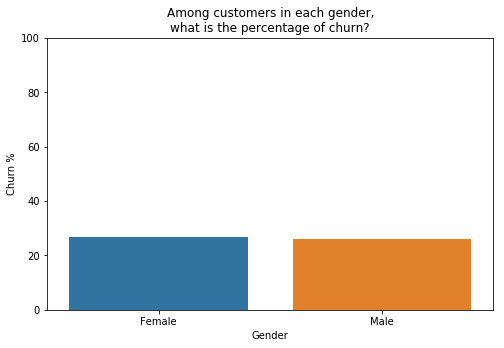

In [22]:
fig, axes3 = plt.subplots(figsize=(8,5))

# Chances of churn based on gender
sns.barplot(x="gender", y=telcom["ChurnVal"]*100, data=telcom, ci=None, ax=axes3)
axes3.set_xlabel('Gender')
axes3.set_ylabel('Churn %')
from textwrap import wrap

axes3.set_title('\n'.join(wrap('Among customers in each gender, what is the percentage of churn?', 35)))
axes3.set_ylim(0,100)
plt.show()

- Both in the churned or retained category - percentage of males and females are almost equally distributed.
- Out of all male customers, approx 26% churned. While among females, the churn percentage is approx 27%. Both are almost at     equal level.
- It can be concluded that probability of churn does not depend on gender of the customer.

*SENIOR CITIZENS 

To analyse if the customer in the dataset is a senior citizen or not 

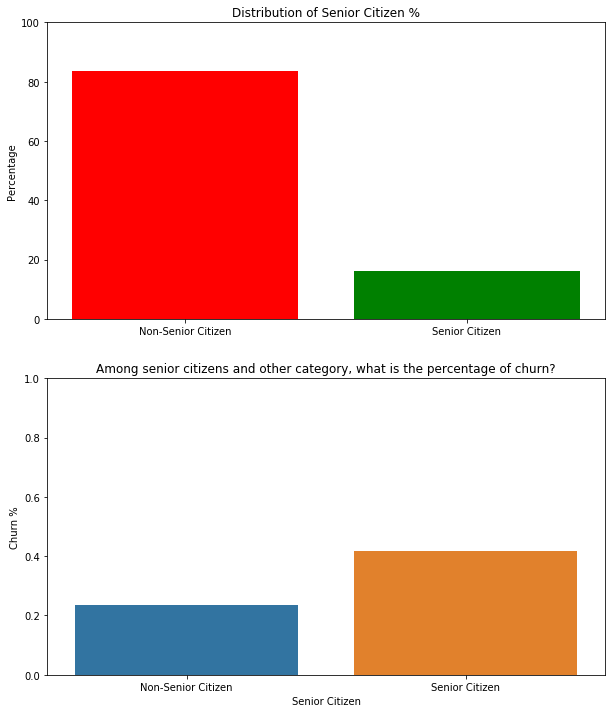

In [24]:
fig, (axes1, axes2) = plt.subplots(2, 1, figsize=(10,12))

data = telcom["SeniorCitizen"].value_counts(normalize=True).sort_index()
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Senior Citizen %')
axes1.set_ylabel('Percentage')
axes1.set_xticks([0, 1])
axes1.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes1.set_ylim(0,100)

#The second plot shows the disturibution of churn based on senior citizen.

sns.barplot(x="SeniorCitizen", y="ChurnVal", data=telcom, ci=None, ax=axes2)
axes2.set_xlabel('Senior Citizen')
axes2.set_ylabel('Churn %')
axes2.set_title('Among senior citizens and other category, what is the percentage of churn?')
axes2.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
axes2.set_ylim(0,1)

plt.show()


- The first plot shows us that majority of the customers in the dataset are Non-Senior Citizens

- The senior citizen customers churned more than 40%.

- Non-senior customers churn percentage is less than 25%

- We can come to a conclusion that Senior citizens tend to churn more compared  to younger customers.

*PARTNER

Does the customer have a partner and does it influnce churn rate?

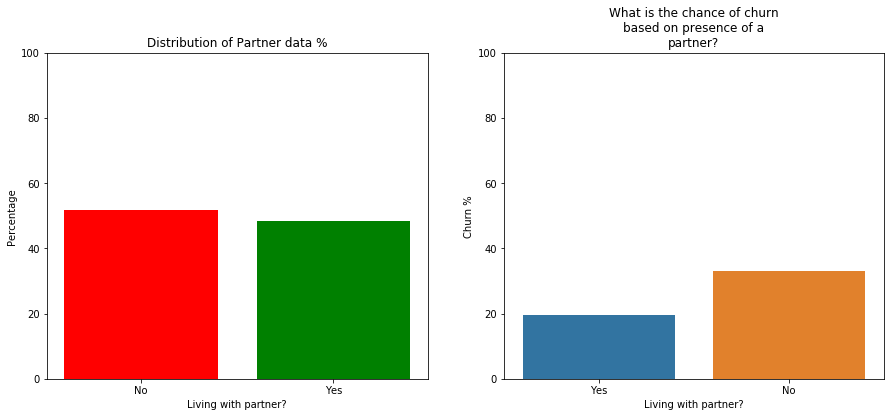

In [26]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = telcom["Partner"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Partner data %')
axes1.set_xlabel('Living with partner?')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Partner", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes2)
axes2.set_xlabel('Living with partner?')
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of a partner?', 30)))
axes2.set_ylim(0,100)

plt.show()

- The dataset contains almost equal distribution of customer data - either     living alone or with partner.

- Customers living alone tend to churn more. the churn percentage of churn customers living alone is 35%. Customers Having       partners Churn rate is below 20%

*DEPENDENTS

Does Customer having dependents affect churn rate?

The First plot shows the distribution of customers based on dependents.

Second plot shows how the churn rate is affected based on dependents.

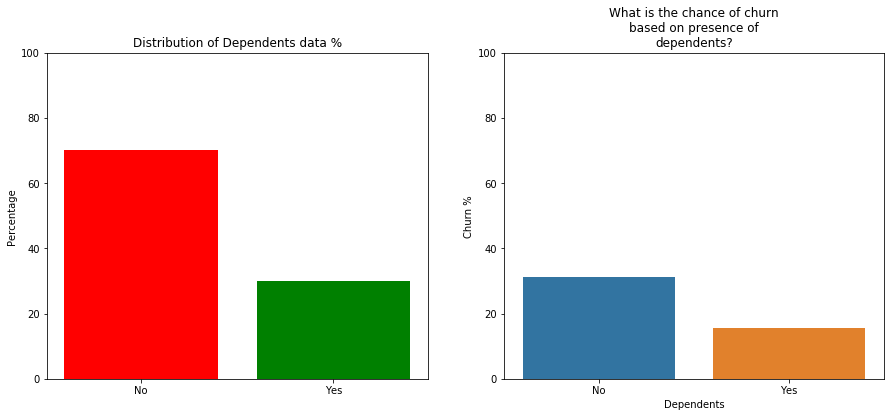

In [27]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of partner data
data = telcom["Dependents"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Dependents data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on partner availibility
sns.barplot(x="Dependents", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on presence of dependents?', 30)))
axes2.set_ylim(0,100)

plt.show()


- The dataset contains almost 70% customers who does not have a dependent, while 30% has one or more dependents.

- Customers without depedents tend to churn more (~30% vs ~20%).

- From Partner and Dependents data we can conclude that - customers who are single/independent, i.e. without partners or dependents tend to leave the CSP more, while customers with partner and/or dependents, usually continue with the same CSP.


*TENURE 

Does customer churn depend on tenure

We First divide the customer tenure into categories as1-year, 2-year to 6 years.

In [28]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['1 yr', '2 yr', '3 yr', '4 yr', '5 yr', '6 yr']
telcom['tenureGroup'] = pd.cut(telcom["tenure"], bins, labels=labels)

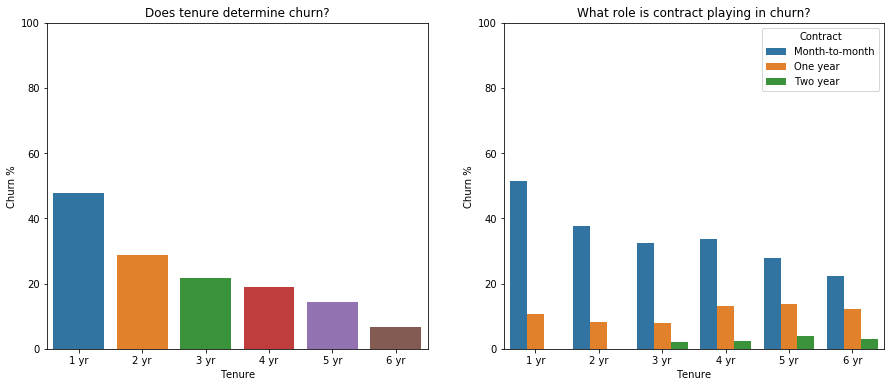

In [33]:
#Plot a Bar plot of tenure vs Churn

fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))
sns.barplot(x="tenureGroup", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes1)
axes1.set_xlabel('Tenure')
axes1.set_ylabel('Churn %')
axes1.set_ylim(0,100)
axes1.set_title('Does tenure determine churn?')

#Bar plot of tenur vs churn vs contract

sns.barplot(x="tenureGroup", y=telcom.ChurnVal*100, hue="Contract", data=telcom, ci=None, ax=axes2)
axes2.set_xlabel('Tenure')
axes2.set_ylabel('Churn %')
axes2.set_ylim(0,100)
axes2.set_title('What role is contract playing in churn?')

plt.show()


- It is observed that newly acquired customers tend to churn more, close to 50% of the customers who have joined recently within 1 year have churned.

- As customer tenure increases, the chance of churn decreases accordingly.

- Hence, the Telecom service providers should concentrate on retaining newly acquired customers. If they can somehow hold the customers for more couple of years, the possibility of those customers continuing with the same teleom service provider increases multifold.

- In addition, Telecom service provider should try to get customers on contract for longer duration instead of selling monthly plans. This is another important factor for churn determination.


*CONTRACT 

To analyse disturibution of contract in the dataset and 
check the rate at which contract influences churn rate

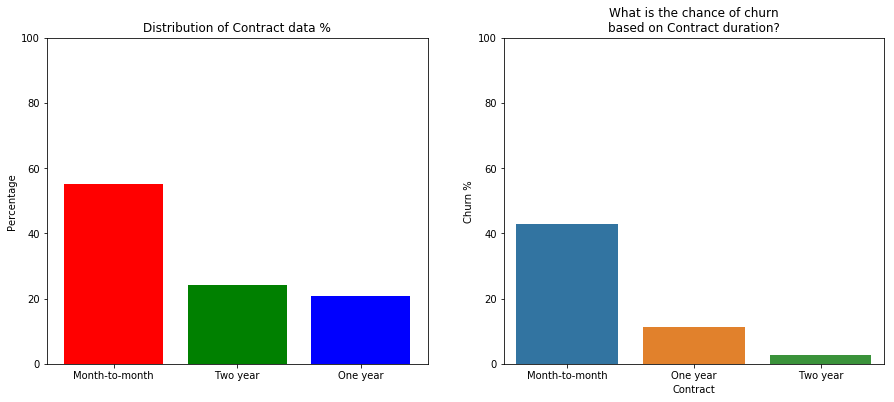

In [34]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = telcom["Contract"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Contract data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="Contract", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on Contract duration?', 30)))
axes2.set_ylim(0,100)

plt.show()

- It is observed that 55% customer are on month-to-month or monthly plans.
- while only close to 20% are on 1 or 2 year plan.
- Another observation is the churn rate is high among monthly customers and least among 2-year contracted customers. 
- While this is expected because of the contract duration, this is an alarming signal for telecom service providers since they should try to retain contracted customers and bring the churn rate to near zero, in addition to spending effort on month-to-month customers.

*PAPERLESS BILLING 

This is to analyse how the customer prefers the bill to be delivered whether online or post.

The first plot explains the distribution of paperless billing of customers in the dataset.

Second plot shows the churn based on paperless billing.

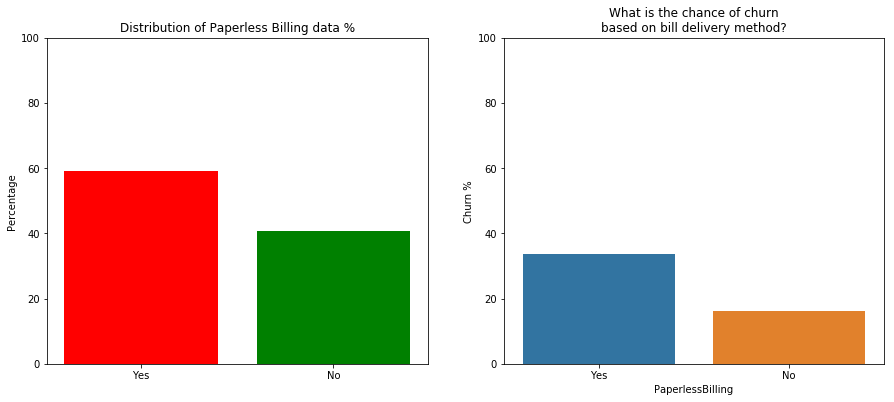

In [35]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Paperless billing
data = telcom["PaperlessBilling"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Paperless Billing data %')
axes1.set_ylabel('Percentage')
axes1.set_ylim(0,100)

# Chances of churn based on Paperless billing
sns.barplot(x="PaperlessBilling", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
axes2.set_title("\n".join(wrap('What is the chance of churn based on bill delivery method?', 30)))
axes2.set_ylim(0,100)

plt.show()

- It is observed that almost 60% customers prefer paper-less billing.
- Second plot shows that almost 35% of them left the telecom service provider.
- Apparently a direct relation between bill mode and churn cannot be established, it must be investigated if customers receiving soft copies of bills are getting clear and transparent information on all the charges, and proper service and care if they face any difficutly in interpreting the bills.

*PAYMENT METHOD 

The following plots explain how the customer expect his bill to be delivered? Through digital channels or by post?

First plot shows the distribution of preference of customers based on payment methods. 

second plot shows the effect of churning based on the payment methods.

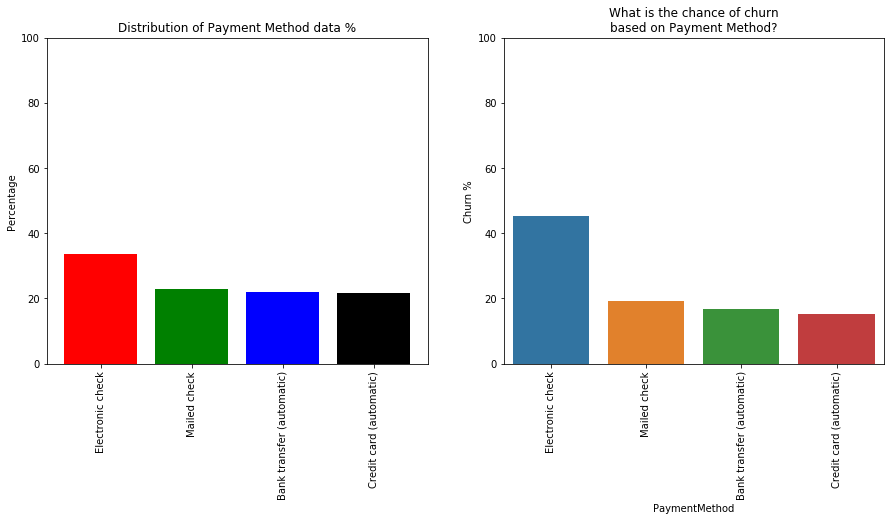

In [36]:
from textwrap import wrap
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6))

# Plot distribution of Contract data
data = telcom["PaymentMethod"].value_counts(normalize=True)
axes1.bar(data.index, data*100, color=my_colors)
axes1.set_title('Distribution of Payment Method data %')
axes1.set_ylabel('Percentage')
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylim(0,100)

# Chances of churn based on Contract
sns.barplot(x="PaymentMethod", y=telcom.ChurnVal*100, data=telcom, ci=None, ax=axes2)
axes2.set_ylabel('Churn %')
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title("\n".join(wrap('What is the chance of churn based on Payment Method?', 30)))
axes2.set_ylim(0,100)

plt.show()

- It is observed that customers with payment method as "Electronic Check" is slightly higher than customers with other modes of payment it is close to 35%

- On the second plot we can see that those customers churn at a rate of 45% and is the highest.

- The telecom service providers must encourage the cusomers to use automated mode of payments.

*MONTHLY CHARGES 

This is to analyse how the monthly charges are distributed in the dataset and how the churn rates differ based on them.


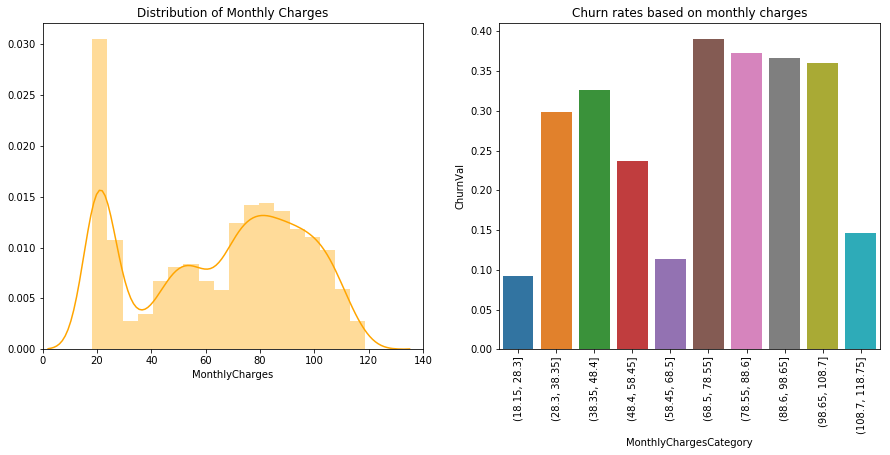

In [37]:
fig, [axes1, axes2] = plt.subplots(1,2,figsize=(15,6))

# Plot Distribution of MonthlyCharges occurance
sns.distplot(telcom.MonthlyCharges, color='orange', ax=axes1)
axes1.set_title('Distribution of Monthly Charges')
axes1.set_xlim(0,140)

# Categorize MonthlyCharges into bins and plot
telcom['MonthlyChargesCategory'] = pd.cut(telcom["MonthlyCharges"], bins=10)
sns.barplot(x='MonthlyChargesCategory', y='ChurnVal', data=telcom, ci=None, ax=axes2)
[items.set_rotation(90) for items in axes2.get_xticklabels()]
axes2.set_title('Churn rates based on monthly charges')

plt.show()

- It is observed that a huge number of customers use very cheap plans
  and the churn rate with them is intersetingly low
    
- The observed churn rate is very high among high spender customers,
  typically between USD 70 to USD 100 per month.

From the above analysis we can conclude with the following points:

1. The features such as tenure group, Contract, Paperless Billing, Monthly Charges and Senior 
   Citizens appear to play a vital role in customer churn.

2. Tenure and Contract duration seems to be strong factors in determining churn.

3. the telecom service providers should investigate if customers receiving digital invoice have any concern with understanding the bill details.

4. They should encourage customers to move to automated payment.

5. Gender does not play an important role. However, they should take care of the experience of senior citizens.